## Short Description

The notebook briefly shows how the probability density distribution derived from the calculation by Berry and the one suggested by the reviewer gives different results. We take a simple delta function distribution which, by definition of the rest frame, has two peaks moving in opposite directions at the same speed. The boosted density distribution function is then produced, according to both methods, which as we see, lead to different results.


## Notation for the code 

`v` = boost; `v1` = group velocity; `u0` = rest frame delta function peak. 

`u1` and `u2` calculate the peaks of the delta-function waves in the boosted frame.

`umean` and `Delta` calculate the mean and variances of the distribution of this power spectrum.

`P` calculates the pdf of the group velocities as a function of the group velocity `v1` and `umean` and `Delta`.

`Pprop` calculates the same using the reviewer-suggested formula.

In order for them to be the same distribution in all generality, `P` and `Pprop` must overlap.

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive

In [48]:
def u1(u0,v):
    return (u0 - v)/(1 - u0*v)
def u2(u0,v):
    return -(u0 + v)/(1 + u0*v)
def umean(a,b):
    return sum([a,b])
def Delta(a,b):
    return a**2+b**2
def P(ubar,D,v1):
    return D**2/(2*((v1-ubar)**2+(D)**2)**(3/2))
def Pprop(v,v1,ubar,D):
    return ((1 - v**2)/(1 + v1*v)**2)*P(ubar,D,(v1 + v)/(1 + v1*v))

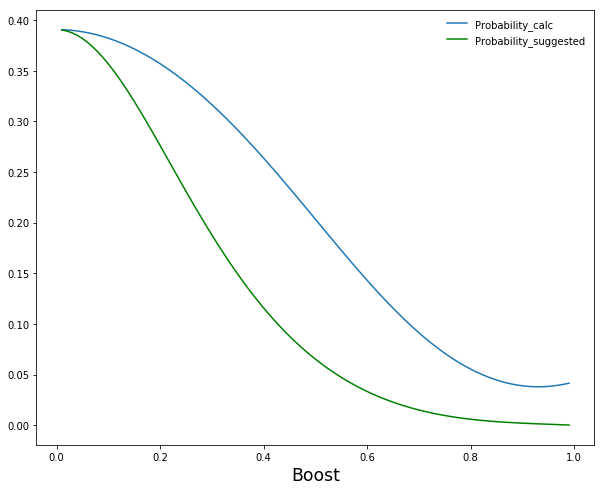

In [60]:
u0=0.8; 
v=np.arange(0.01,1,0.01)
v1=np.arange(0.01,1,0.01)
def Probs(v,v1):
    return P(umean(u1(u0,v),u2(u0,v)),Delta(u1(u0,v),u2(u0,v)),v1)
fig = plt.figure(figsize = (10,8))
plt.plot(v,Probs(v,v1),label = 'Probability_calc');
plt.plot(v,Pprop(v,v1,umean(u1(u0,v),u2(u0,v)),Delta(u1(u0,v),u2(u0,v))),label = 'Probability_suggested', color = 'g');
plt.xlabel('Boost',fontsize = 'xx-large')
plt.legend(frameon=False);
#interactive_plot = interactive(Probs(v,v1), v=(0,1), v1=(0,1))
#interactive_plot
